<a href="https://colab.research.google.com/github/pmap1986/Paula_Alfonso_KC/blob/main/Taller_semana8_Paula_Alfonso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Conectarse al drive

In [38]:
from google.colab import drive
import os
drive.mount('/content/gdrive')
# Establecer ruta de acceso en drive
import os
print(os.getcwd())
os.chdir("/content/gdrive/My Drive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/Mujeres digitales sena/Semana 9


In [39]:
%cd '/content/gdrive/MyDrive/Mujeres digitales sena/Semana 9'

/content/gdrive/MyDrive/Mujeres digitales sena/Semana 9


## 1.1 Cargar paquetes

In [40]:
import pandas                  as pd
from   scipy import stats
import numpy                   as np
import matplotlib.pyplot       as plt
import seaborn                 as sns
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# 2. Cargar los datos (Regresion)

In [41]:
data_wine_1= pd.read_csv('wine_1.csv',sep=',')
data_wine_1= data_wine_1.drop(columns=['Wine'])


In [42]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [43]:
data_wine_1.head()

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [44]:
data_wine_1.columns=['Alcohol','AcidoMalico','Ceniza','ACL','Mg','Fenoles','Flavonoides', 'Noflavfenoles','Taninos','Color','Hue','OD','Proline']
data_wine_1.columns

Index(['Alcohol', 'AcidoMalico', 'Ceniza', 'ACL', 'Mg', 'Fenoles',
       'Flavonoides', 'Noflavfenoles', 'Taninos', 'Color', 'Hue', 'OD',
       'Proline'],
      dtype='object')

In [45]:
model1 = 'Proline~Alcohol + Ceniza+ ACL+ Mg +Color + Hue'
lm1 = sm.ols(formula= model1, data= data_wine_1).fit()
lm1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Proline   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     46.28
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           2.23e-33
Time:                        00:51:29   Log-Likelihood:                -1190.1
No. Observations:                 178   AIC:                             2394.
Df Residuals:                     171   BIC:                             2417.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1933.8986    343.602     -5.628      0.000   -2612.147   -1255.650
Alcohol      145.9742     25.245      5.782      0.000      96.142     195.806
Ceniza       265.3759     70.347      3.772      0.000     126.516     404.236
ACL          -32.5088      5.999     -5.419      0.000     -44.350     -20.668
Mg             3.2818      1.136      2.888      0.004       1.039       5.525
Color         22.4164      9.567      2.343      0.020       3.531      41.301
Hue          363.5324     83.990      4.328      0.000     197.742     529.323
==============================================================================
Omnibus:                        1.814   Durbin-Watson:                   1.732
Prob(Omnibus):                  0.404   Jarque-Bera (JB):                1.831
Skew:                           0.240   Prob(JB):                        0.400
Kurtosis:                       2.870   Cond. No.                     2.41e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.41e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

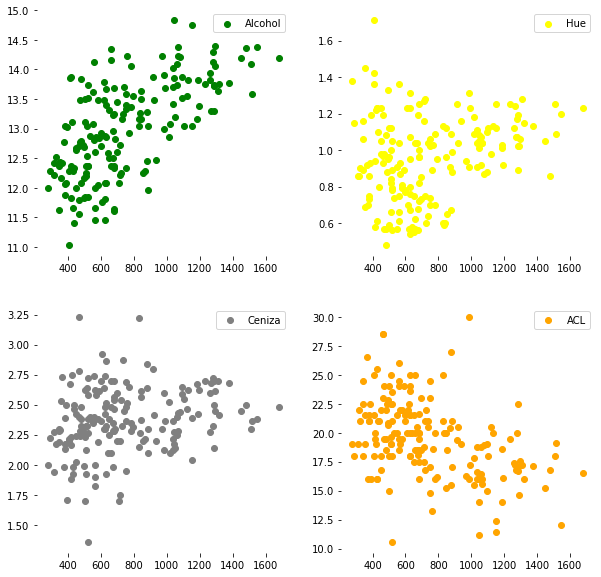

In [75]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,10))
plt.subplot(221, frameon=False,)
plt.scatter(data_wine_1['Proline'],data_wine_1['Alcohol'],label="Alcohol", color="green")
plt.legend()

plt.subplot(222, frameon=False)
plt.scatter(data_wine_1['Proline'],data_wine_1['Hue'],label="Hue", color="yellow")
plt.legend()

plt.subplot(223, frameon=False,)
plt.scatter(data_wine_1['Proline'],data_wine_1['Ceniza'],label="Ceniza", color="grey")
plt.legend()

plt.subplot(224, frameon=False)
plt.scatter(data_wine_1['Proline'],data_wine_1['ACL'],label="ACL", color="orange")
plt.legend()

# 3. Definir la matriz de diseño (X) y el vector respuesta (y)

In [ ]:
X= data_wine_1[['Alcohol','Ceniza', 'ACL','Mg', 'Color',  'Hue']]
y= data_wine_1['Proline'] 

In [ ]:
print(X.shape)
print(y.shape)

(178, 6)
(178,)


In [ ]:
y_1= np.transpose(np.array([y])) # Llevar a un vector vertical porque estaba como un vector horizontal
y_1.shape

(178, 1)

# 5. Definir muestras de entrenamiento y test

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_1, test_size=0.3, random_state=42,shuffle=True)

In [ ]:
print('Train')
print(X_train.shape)
print(y_train.shape)
print('-------------')
print('Test')
print(X_test.shape)
print(y_test.shape)

Train
(124, 6)
(124, 1)
-------------
Test
(54, 6)
(54, 1)


# 6. Entrenar el modelo

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# 7. Analizar los coeficientes

In [ ]:
#Recuperamos la intersección
print(regressor.intercept_)

[-1652.4408787]


In [ ]:
print(regressor.coef_)

[[133.46411524 218.05010824 -30.79445519   3.55893587  22.31411626
  285.62792399]]


In [ ]:
regressor.coef_[0]

array([133.46411524, 218.05010824, -30.79445519,   3.55893587,
        22.31411626, 285.62792399])

In [ ]:
pd.DataFrame(regressor.coef_[0], X.columns, columns=['Coeficiente'])

,Coeficiente
Alcohol,133.464115
Ceniza,218.050108
ACL,-30.794455
Mg,3.558936
Color,22.314116
Hue,285.627924


*   Por cada unidad que aumente en Alcohol se aumenta en 133 el Proline.
*   Por cada unidad que aumente de Ceniza se aumenta en 218 el Proline.
*   Por cada unidad que aumente en Hue se aumenta en 285 el Proline.
*   Por cada unidad que aumente en ACL se disminuye en 30 el Proline.
*   Por cada unidad que aumente en Mg se aumenta en 3.55 el Proline.
*   Por cada unidad que aumente en Color se aumenta en 22 el Proline.

En cambio es inversamente proporcional con ACL.

In [ ]:
#El proline tiene una relacion directamente proporcional con Hue, ceniza y el Alcohol, 
#Es decir que el proline depende de estas variables y por lo tanto son importantes.

#  Calcular las predicciones

In [ ]:
#Hacemos nuestras predicciones
y_pred = regressor.predict(X_test)


In [ ]:
from sklearn import metrics 
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 166.96849317542745
Mean Squared Error: 41444.545030157264
Root Mean Squared Error: 203.57933350455116


# Clasificacion (Breast_Cancer)

$\color{purple}{\text{Tarea parte 2: clasificacion, pueden elegir SVM, Regresion logistica, KNN, Arbol de Decision o Random Forest}}$



1) ID number

2) Diagnosis (M = malignant, B = benign) Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)

b) texture (standard deviation of gray-scale values)

c) perimeter

d) area

e) smoothness (local variation in radius lengths)

f) compactness (perimeter^2 / area - 1.0)

g) concavity (severity of concave portions of the contour)

h) concave points (number of concave portions of the contour)

i) symmetry

j) fractal dimension ("coastline approximation" - 1)

In [4]:
data_cancermama= pd.read_csv('Breast_cancer_1.csv',sep=',')
data_cancermama.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


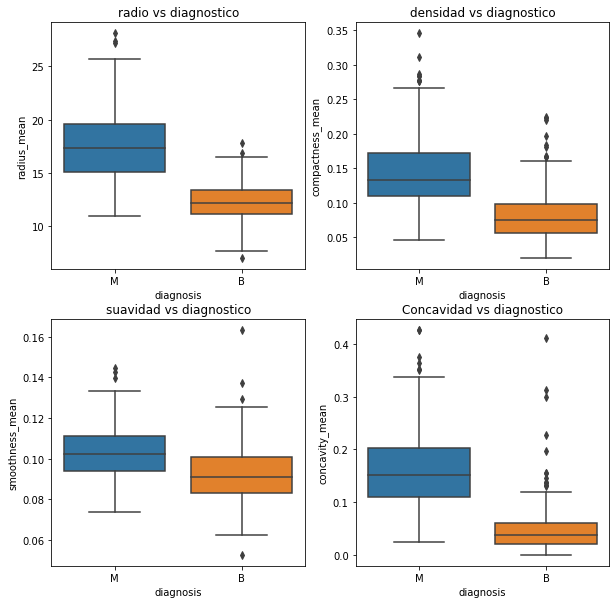

In [70]:
plt.figure(figsize=(10,10))
plt.subplot(221)
sns.boxplot(x='diagnosis', y = 'radius_mean', data = data_cancermama) 
plt.title("radio vs diagnostico");
plt.subplot(222)
sns.boxplot(x='diagnosis', y = 'compactness_mean', data = data_cancermama) 
plt.title("densidad vs diagnostico");
plt.subplot(223)
sns.boxplot(x='diagnosis', y = 'smoothness_mean', data = data_cancermama) 
plt.title("suavidad vs diagnostico");
plt.subplot(224)
sns.boxplot(x='diagnosis', y = 'concavity_mean', data = data_cancermama) 
plt.title("Concavidad vs diagnostico");


# Definir matriz de diseño y vector y

In [11]:
X=data_cancermama[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]

y= data_cancermama['diagnosis'] 

# Normalizar los datos

In [12]:
from sklearn.preprocessing import StandardScaler
X_n= StandardScaler().fit_transform(X)

In [13]:
X_n

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

# Separar en train y test

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_n, y, test_size=0.25, random_state=42,shuffle=True)

# Entrenar el modelo

In [15]:
from sklearn.linear_model import LogisticRegression
# Paso 4: Creamos una instancia de la Regresión Logística
regresion_logistica = LogisticRegression()
# Paso 5: Entrenamos la regresión logística con los datos de entrenamiento
regresion_logistica.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# Sacar las predicciones

In [16]:
prediccion = regresion_logistica.predict(X_test)
print(prediccion)

['B' 'M' 'M' 'B' 'B' 'M' 'M' 'M' 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'M' 'B' 'B'
 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B'
 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B'
 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'M'
 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'M'
 'B' 'B' 'M' 'B' 'M' 'M' 'M' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'M'
 'M' 'B' 'B' 'M' 'M' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'M' 'B']


In [17]:
probabilidades_prediccion = regresion_logistica.predict_proba(X_test)
print(probabilidades_prediccion)

[[8.73833012e-01 1.26166988e-01]
 [1.14078910e-05 9.99988592e-01]
 [2.88081498e-03 9.97119185e-01]
 [9.99438122e-01 5.61877674e-04]
 [9.99924704e-01 7.52955941e-05]
 [1.54535940e-10 1.00000000e+00]
 [2.58104094e-09 9.99999997e-01]
 [3.81828753e-02 9.61817125e-01]
 [5.86600100e-01 4.13399900e-01]
 [9.99310094e-01 6.89906099e-04]
 [9.46354517e-01 5.36454827e-02]
 [1.46920179e-02 9.85307982e-01]
 [9.93841031e-01 6.15896876e-03]
 [1.43912656e-01 8.56087344e-01]
 [9.97981069e-01 2.01893087e-03]
 [1.91127033e-03 9.98088730e-01]
 [9.98017107e-01 1.98289315e-03]
 [9.99990679e-01 9.32088200e-06]
 [9.99999181e-01 8.19238945e-07]
 [1.38667114e-06 9.99998613e-01]
 [9.17823406e-01 8.21765942e-02]
 [9.89377836e-01 1.06221641e-02]
 [6.23060581e-09 9.99999994e-01]
 [9.99923616e-01 7.63840382e-05]
 [9.98924684e-01 1.07531570e-03]
 [9.99555085e-01 4.44915169e-04]
 [9.98654157e-01 1.34584347e-03]
 [9.92741469e-01 7.25853065e-03]
 [9.96656769e-01 3.34323101e-03]
 [1.20770947e-05 9.99987923e-01]
 [9.992761

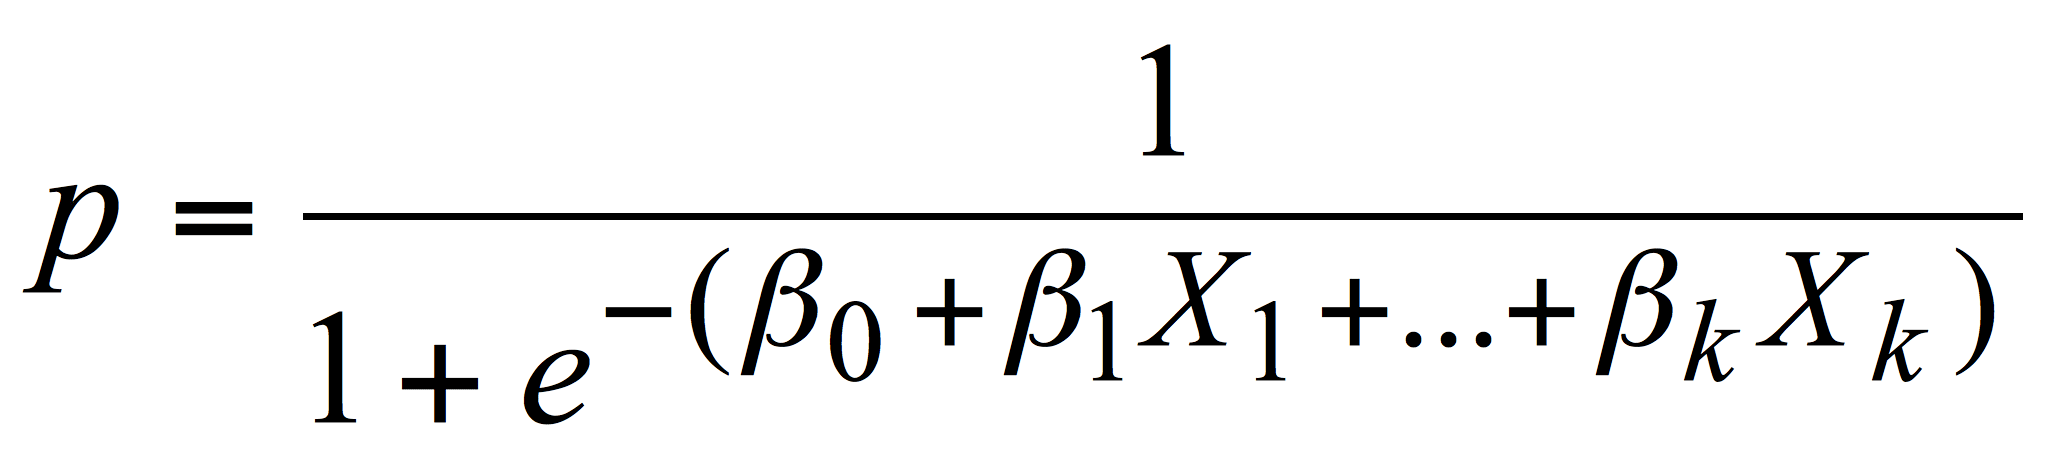

In [18]:
intercepto=regresion_logistica.intercept_
intercepto[0]

-0.3153428195089883

In [19]:
beta1=regresion_logistica.coef_
beta1

array([[ 0.40047319,  0.42002301,  0.35141264,  0.45857397,  0.19431027,
        -0.60368261,  0.75313073,  1.08134394, -0.24303697, -0.0882157 ,
         1.25904487, -0.22903996,  0.55497383,  0.90885204,  0.18922479,
        -0.64110343,  0.16319815,  0.39432976, -0.53301572, -0.73504954,
         0.8375931 ,  1.32106025,  0.51623822,  0.8232146 ,  0.54879811,
        -0.10091389,  1.00984329,  0.78131527,  1.21951368,  0.16004465]])

In [22]:
X_test

array([[-0.47069438, -0.16048584, -0.44810956, ..., -0.19956318,
         0.18320441,  0.19695794],
       [ 1.36687747,  0.47014935,  1.30288585, ...,  0.97897545,
        -0.56582801, -1.00057787],
       [ 0.37850807,  0.04429607,  0.40082046, ...,  0.56024403,
        -0.10314275, -0.20813168],
       ...,
       [-0.87683468, -0.57237672, -0.8670139 , ..., -0.61357437,
         0.15731992, -0.28460551],
       [ 1.61396982,  0.66562299,  1.56650313, ...,  1.89104864,
        -0.21476962, -0.43201158],
       [-1.09836575, -1.64515466, -1.07996724, ..., -0.72548986,
         0.05863531, -0.37271666]])

In [24]:
X.columns.shape

(30,)

In [30]:
import pandas as pd
df= pd.DataFrame(X_test)
df['X_pred']= df[0]*beta1[0][0]+df[1]*beta1[0][1]+df[2]*beta1[0][2]+df[3]*beta1[0][3]+df[4]*beta1[0][4]+df[5]*beta1[0][5]+df[6]*beta1[0][6]+\
df[7]*beta1[0][7]+intercepto[0]
df['Probabilidades']=1/(1+np.exp(-df.X_pred)) # Calculo de probabilidades 
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,X_pred,Probabilidades
0,-0.470694,-0.160486,-0.448110,-0.491999,0.234114,0.027651,-0.109847,-0.276232,0.413949,0.132176,-0.032743,-0.313616,-0.182696,-0.221053,-0.029327,-0.355912,-0.161929,-0.231333,-0.329612,-0.079018,-0.269040,-0.168905,-0.333935,-0.356299,0.448503,-0.104741,-0.024412,-0.199563,0.183204,0.196958,-1.306972,0.212994
1,1.366877,0.470149,1.302886,1.351264,-0.446227,-0.027309,0.241064,0.789060,-0.838325,-1.160679,1.384594,-0.760851,1.296951,1.225780,-0.865695,-0.500666,-0.305168,0.308825,-0.809083,-0.793157,1.779007,0.147012,1.746605,1.732277,-0.572873,-0.131459,-0.016736,0.978975,-0.565828,-1.000578,2.471611,0.922128
2,0.378508,0.044296,0.400820,0.267377,0.913744,0.340350,0.725686,0.824140,0.435855,-0.685782,0.249497,-0.781898,0.112838,0.175418,-0.267004,-0.594561,-0.124794,-0.140496,-0.795764,-0.504551,0.619345,0.052562,0.525386,0.484159,0.974533,-0.094562,0.512911,0.560244,-0.103143,-0.208132,1.528112,0.821730
3,-0.490575,-0.374576,-0.432457,-0.532101,0.643316,0.516599,-0.142993,-0.539846,-0.002259,1.165609,-0.824604,0.441152,-0.327740,-0.547998,0.986380,0.417599,0.554262,-0.020461,0.160756,0.835972,-0.701842,-0.450625,-0.525756,-0.641257,0.553709,0.054930,-0.152986,-0.622863,-0.557739,0.534440,-1.943424,0.125272
4,-0.734828,-1.128546,-0.713374,-0.716683,0.247636,0.145150,-0.269044,-0.592724,0.023298,0.711976,-0.457547,0.999969,-0.612877,-0.428529,1.703076,0.874216,0.783709,0.509965,-0.259386,0.649494,-0.830233,-0.976611,-0.848337,-0.743216,0.093432,-0.270137,-0.443716,-0.691687,-0.924975,-0.144403,-2.546048,0.072692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,0.145616,-0.942380,0.156563,-0.008501,1.198406,0.560187,0.136356,0.560267,1.111279,0.093901,0.383760,-0.870256,0.469260,0.053308,-0.511014,1.041885,0.413345,0.719215,0.451344,0.395687,0.014664,-1.211106,0.063706,-0.135330,-0.204652,0.347555,-0.056556,0.382093,0.404840,0.043456,0.001493,0.500373
139,0.091654,0.216499,0.103839,-0.034667,0.167930,0.308132,0.366614,0.280661,0.505223,0.264013,-0.707304,-1.026834,-0.702973,-0.460212,-0.999033,-0.531406,-0.394360,-0.728830,-0.644416,-0.688003,0.426758,0.723479,0.316885,0.287273,1.000835,0.962702,1.077099,1.053586,2.996525,0.961696,0.259105,0.564416
140,-0.876835,-0.572377,-0.867014,-0.801153,0.806996,-0.498443,-0.732448,-0.622129,-0.356400,0.085395,-0.752419,0.308704,-0.754456,-0.589582,-0.627685,-0.901115,-0.707363,-0.699633,-0.407102,-0.604031,-0.799171,0.124213,-0.814083,-0.719308,0.198638,-0.674722,-0.793935,-0.613574,0.157320,-0.284606,-2.345626,0.087414
141,1.613970,0.665623,1.566503,1.720997,0.138753,-0.031099,0.742007,1.188093,-0.838325,-1.254241,1.274152,-0.362603,1.484567,1.585507,-0.182334,-0.365972,0.066854,0.553762,-0.845406,-0.680060,2.288430,0.847240,2.369129,2.667486,0.825491,0.386359,1.271399,1.891049,-0.214770,-0.432012,3.839580,0.978950


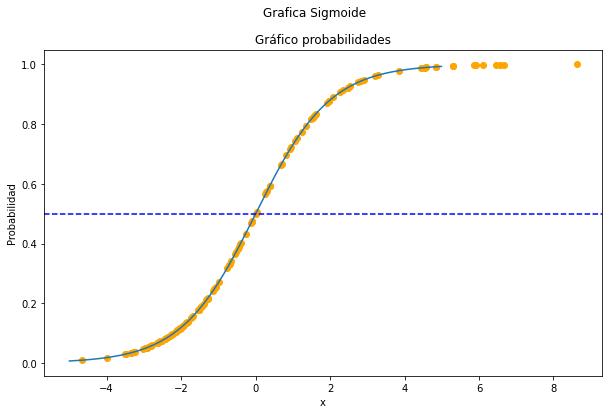

In [73]:
import matplotlib.pyplot as plt
import math
def sigmoid(x):
  a=[]
  for item in x:
    a.append(1/(1+math.exp(-item)))
  return a
x= np.arange(-5,5,0.01)
sig=sigmoid(x)
plt.figure(figsize=(10,6))
plt.plot(x,sig)

plt.axhline(y=0.5, color='b',linestyle='--')
plt.xlabel('x')
plt.ylabel('Probabilidad')
plt.title('Gráfico probabilidades')
plt.suptitle('Grafica Sigmoide')
plt.scatter(df.X_pred,df.Probabilidades,color='orange')

# Comparar predicciones con valores reales

In [32]:
y_test

204    B
70     M
131    M
431    B
540    B
      ..
89     B
199    M
411    B
18     M
390    B
Name: diagnosis, Length: 143, dtype: object

In [33]:
prediccion

array(['B', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'B',
       'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M',
       'B', 'B', 'M', 'B', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'M',
       'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'M', 'M', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'M',
       'M', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B'],
      dtype=object)

In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,prediccion)

0.9790209790209791

In [ ]:
#El modelo tiene un 97% de precisión calculando cual es B(Benigno) o M(Maligno)

In [35]:
from sklearn.metrics import classification_report
M=classification_report(y_test,prediccion)
print(M)

              precision    recall  f1-score   support

           B       0.99      0.98      0.98        89
           M       0.96      0.98      0.97        54

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [ ]:
#El modelo es muy bueno porque es capaz de predecir por igual entre B y M con un 96 a 99% de precisión.